In [172]:
import pandas as pd
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
import scipy.stats as stats

import scipy

import time
from sklearn.decomposition import PCA
from sklearn import decomposition


from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors, cross_validation

from matplotlib.colors import ListedColormap

import statsmodels.api as sm
from sklearn import linear_model

from matplotlib import style 
style.use('ggplot')

from sklearn.cluster import KMeans


In [231]:
data = pd.DataFrame.from_csv("/Users/raphaelpresberg/Desktop/Stevens/BIA 652 Multivariate Data Analysis/NYC_Taxis/NYC_taxis.csv")


#data understanding
data.head()
data.tail(10)
sLength = len(data['Pickup Time'])
data['Trip time'] = pd.Series(np.random.randn(sLength), index = data.index)
data['new_col'] = range(0, sLength)
data = data.reset_index()
data['new_col'] = data.index
print(data.head())
data.info()
data.describe()



  Pickup Date  Pickup Time  Dropoff Date Dropoff Time Vendor ID  \
0  2015-01-01  0:00:00.000      20150101  0:00:00.000       VTS   
1  2015-01-01  0:00:00.000      20150101  0:00:00.000       VTS   
2  2015-01-01  0:00:00.000      20150101  0:11:26.000       CMT   
3  2015-01-01  0:00:01.000      20150101  0:03:49.000       CMT   
4  2015-01-01  0:00:03.000      20150101  0:10:50.000       VTS   

   Passenger Count  Trip Distance (in miles)  Pickup Longitude  \
0                1                      1.68        -73.991547   
1                3                      1.56        -74.001320   
2                5                      4.00        -73.971436   
3                1                      0.80        -73.860847   
4                1                      1.58        -73.987579   

   Pickup Latitude  Rate Code   ...    Dropoff Latitude  Payment Type  \
0        40.750069          1   ...            0.000000           CSH   
1        40.729057          1   ...           40.71966

,Dropoff Date,Passenger Count,Trip Distance (in miles),Pickup Longitude,Pickup Latitude,Rate Code,Dropoff Longitude,Dropoff Latitude,Fare Amount,Surcharge,MTA Tax,Tip Amount,Tolls Amount,Total Amount,Trip time,new_col
count,7.273100e+05,727310.000000,7.273100e+05,727310.000000,727310.000000,727310.000000,727310.000000,727310.000000,727310.000000,727310.000000,727310.000000,727310.000000,727310.000000,727310.000000,727310.000000,727310.00000
mean,2.015010e+07,1.783453,1.959882e+01,-72.425570,39.897802,1.045149,-72.440314,39.907709,12.417926,0.329787,0.497078,1.280769,0.258895,15.081973,0.001547,363654.50000
std,5.124534e-01,1.361950,1.407088e+04,10.585702,5.831541,0.628995,10.535020,5.824130,11.253458,0.344260,0.040088,2.473669,1.307798,13.160194,1.000717,209956.45648
min,2.015010e+07,0.000000,0.000000e+00,-79.732277,0.000000,1.000000,-77.459442,-9.029157,-100.000000,-1.000000,-0.500000,-92.420000,-8.000000,-100.300000,-5.582976,0.00000
25%,2.015010e+07,1.000000,1.090000e+00,-73.991249,40.733257,1.000000,-73.990837,40.732002,6.500000,0.000000,0.500000,0.000000,0.000000,8.000000,-0.673990,181827.25000
50%,2.015010e+07,1.000000,1.830000e+00,-73.981209,40.752293,1.000000,-73.979294,40.752449,9.000000,0.500000,0.500000,0.000000,0.000000,11.150000,0.001203,363654.50000
75%,2.015010e+07,2.000000,3.440000e+00,-73.965103,40.767391,1.000000,-73.959824,40.768417,14.000000,0.500000,0.500000,1.950000,0.000000,16.800000,0.676912,545481.75000
max,2.015012e+07,9.000000,1.200000e+07,0.000000,50.769863,99.000000,85.274025,459.533325,3005.500000,9.000000,0.500000,850.000000,89.750000,3006.350000,4.769908,727309.00000


# Outliers

In [77]:

def basics_info (initial_numpy_array):
    print("Mean: ", np.mean(initial_numpy_array))
    #median cost of a trip without @ without taxes
    print("Median: ", np.median(initial_numpy_array))
    #The numpy.ptp() function returns the range (maximum-minimum) of values along an axis.
    print("Range: ", np.ptp(initial_numpy_array))
    #standard deviation & variance
    print("SD: ", np.std(initial_numpy_array))
    print("Variance: ", np.var(initial_numpy_array))
    plt.plot(initial_numpy_array)
    plt.show() 


#removing outliers and compute the distribution plot

def removeOutliers(x):
    a = np.array(x)
    outlierConstant = 1
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    resultList = []
    for y in a.tolist():
        if y >= quartileSet[0] and y <= quartileSet[1]:
            resultList.append(y)
    return resultList

def prob_plot(variable):
    
    mu = np.mean(variable)
    sigma = np.std(variable)

    mu, sigma = mu, sigma
    x = mu + sigma * np.array(variable)

    # the histogram of the data
    n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.95)


    plt.xlabel("Prob ")
    plt.ylabel('Probability')
    plt.title('Proba Plot')
   # plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
    plt.axis([20, 190, 0, 0.03])
    plt.grid(True)
    plt.show()
    

def prob_plot_trip_distance(variable):
    
    mu = np.mean(variable)
    sigma = np.std(variable)

    mu, sigma = mu, sigma
    x = mu + sigma * np.array(variable)

    # the histogram of the data
    n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.95)


    plt.xlabel("Prob ")
    plt.ylabel('Probability')
    plt.title('Proba Plot')
   # plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
    plt.axis([0, 11, 0, 0.6])
    plt.grid(True)
    plt.show()
    

    



BEFORE
Mean:  15.0819733951
Median:  11.15
Range:  3106.65
SD:  13.1601852748
Variance:  173.190476467


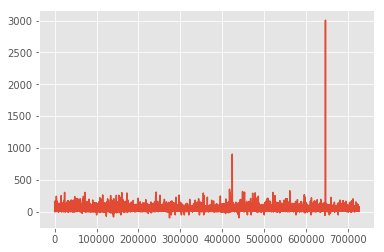

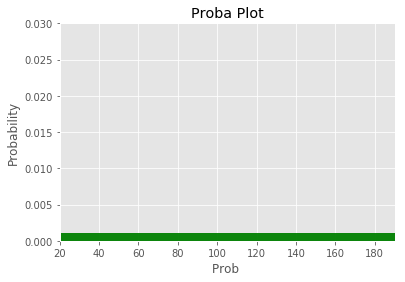

AFTER
Mean:  11.4407643417
Median:  10.3
Range:  25.91
SD:  4.82675778927
Variance:  23.2975907562


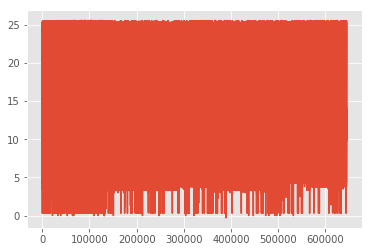

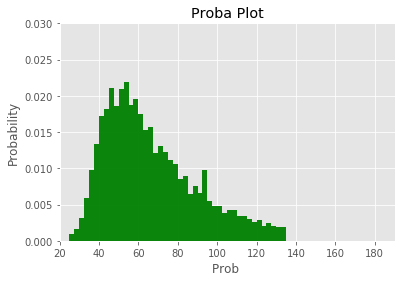

In [9]:
#*******************************************
#STUDY FOR TOTAL AMOUNT 
#*******************************************
total_amount = data.as_matrix(columns = data.columns[19:20])

print("BEFORE")
basics_info(total_amount)
prob_plot(total_amount)
good_total_amount = removeOutliers(total_amount)

print("AFTER")
basics_info(good_total_amount)
prob_plot(good_total_amount)


Mean:  72734.2243413
Median:  1.3
Range:  727409.3
SD:  173132.84601
Variance:  29974982367.4


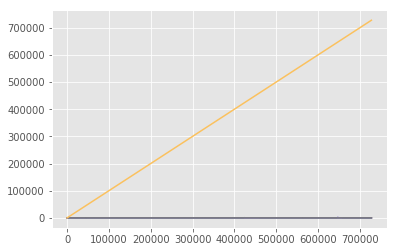

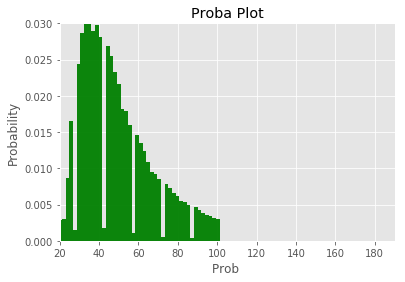

In [8]:
#*******************************************
#STUDY FOR FARE AMOUNT 
#*******************************************

fare_amount = data.as_matrix(columns=data.columns[17:118])

basics_info(fare_amount)
good_fair_amount = removeOutliers(data[['Fare Amount']])
prob_plot(good_fair_amount)


Mean:  12.4179262625
Median:  9.0
Range:  3105.5
SD:  11.2534498698
Variance:  126.640133973


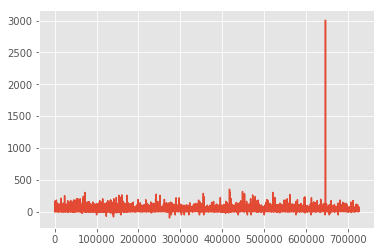

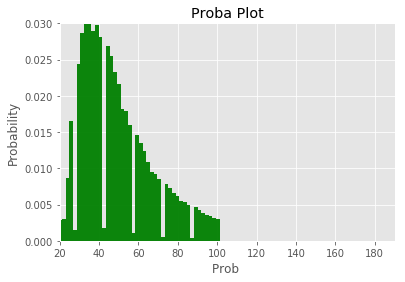

In [30]:
#*******************************************
#STUDY FOR TIP AMOUNT 
#*******************************************

tip_amount = data.as_matrix(columns=data.columns[14:15])

basics_info(tip_amount)
good_tip_amount = removeOutliers(tip_amount)
prob_plot(good_tip_amount)


count    727310.000000
mean          1.783453
std           1.361950
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           9.000000
Name: Passenger Count, dtype: float64
Mean:  1.78345272305
Median:  1.0
Range:  9
SD:  1.3619492225
Variance:  1.85490568468


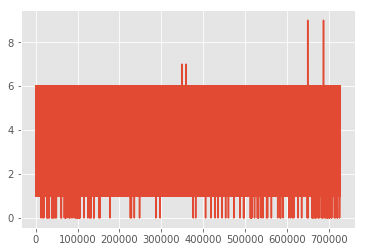

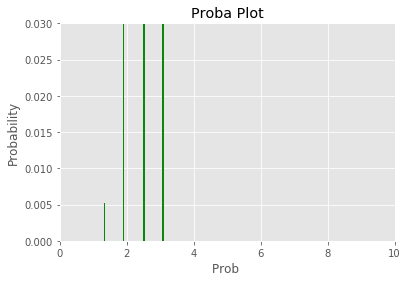

In [57]:
#*******************************************
#STUDY FOR PASSENGER COUNT
#*******************************************

passenger_count = data.as_matrix(columns=data.columns[5:6])

print(data['Passenger Count'].describe())
basics_info(passenger_count)
good_passenger_count = removeOutliers(passenger_count)
#prob_plot_passenger_count(good_passenger_count)



Mean:  19.5988161169
Median:  1.83
Range:  12000000.0
SD:  14070.8739376
Variance:  197989493.369


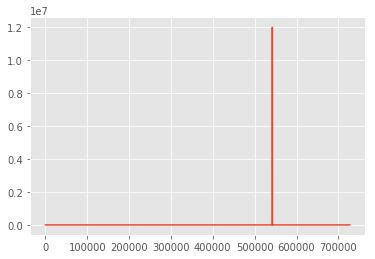

None


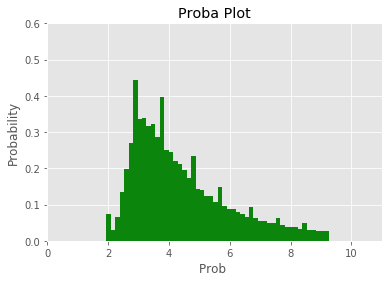

In [10]:
#*******************************************
#STUDY FOR TRIP DISTANCE
#*******************************************

trip_distance = data.as_matrix(columns=data.columns[6:7])

#print(data["Trip Distance (in miles)"].describe())
print(basics_info(trip_distance))
good_trip_distance = removeOutliers(trip_distance)
#basics_info(good_trip_distance)
prob_plot_trip_distance(good_trip_distance)


In [117]:
# OUTLIERS 2 methods
# ==> IQR
# ==> Z-score
data

,Pickup Date,Pickup Time,Dropoff Date,Dropoff Time,Vendor ID,Passenger Count,Trip Distance (in miles),Pickup Longitude,Pickup Latitude,Rate Code,...,Dropoff Longitude,Dropoff Latitude,Payment Type,Fare Amount,Surcharge,MTA Tax,Tip Amount,Tolls Amount,Total Amount,Trip time
0,2015-01-01,0:00:00.000,20150101,0:00:00.000,VTS,1,1.68,-73.991547,40.750069,1,...,0.000000,0.000000,CSH,10.0,0.0,0.5,0.00,0.00,10.80,2.213684
1,2015-01-01,0:00:00.000,20150101,0:00:00.000,VTS,3,1.56,-74.001320,40.729057,1,...,-74.010208,40.719662,CRD,7.5,0.5,0.5,0.00,0.00,8.80,-0.254965
2,2015-01-01,0:00:00.000,20150101,0:11:26.000,CMT,5,4.00,-73.971436,40.760201,1,...,-73.921181,40.768269,CSH,13.5,0.5,0.5,0.00,0.00,14.50,-0.452816
3,2015-01-01,0:00:01.000,20150101,0:03:49.000,CMT,1,0.80,-73.860847,40.757294,1,...,-73.868111,40.752285,CSH,5.0,0.5,0.5,0.00,0.00,6.30,-1.979121
4,2015-01-01,0:00:03.000,20150101,0:10:50.000,VTS,1,1.58,-73.987579,40.765270,1,...,-73.976921,40.776970,CRD,9.0,0.5,0.5,1.90,0.00,12.20,0.386501
5,2015-01-01,0:00:03.000,20150101,0:21:48.000,VTS,2,2.57,-73.969017,40.754269,1,...,-73.994133,40.761600,CSH,14.5,0.5,0.5,0.00,0.00,15.80,0.448558
6,2015-01-01,0:00:04.000,20150101,0:10:44.000,CMT,3,2.50,-73.957008,40.774502,1,...,-73.966019,40.800617,CSH,10.5,0.5,0.5,0.00,0.00,11.80,-0.296978
7,2015-01-01,0:00:05.000,20150101,0:10:52.000,VTS,2,1.30,-73.950500,40.769863,1,...,-73.950943,40.769825,CRD,8.5,0.5,0.5,2.00,0.00,11.80,-0.090478
8,2015-01-01,0:00:06.000,20150101,0:00:48.000,CMT,2,0.00,-73.985367,40.710770,1,...,-73.984772,40.710682,NOC,2.5,0.5,0.5,0.00,0.00,3.80,-1.383870
9,2015-01-01,0:00:06.000,20150101,0:15:15.000,VTS,3,5.62,-73.978104,40.786282,1,...,-74.010170,40.719971,CSH,18.0,0.5,0.5,0.00,0.00,19.30,0.040303


# PCA on all data

In [227]:
#*******************************************
#Dummy variable for Vendor ID
#*******************************************

data = data.iloc[:2000,]

#Vendor ID

#0==> VTS
#1 ==> CMT

i=0
count = 0

a = np.array(data["Vendor ID"])


i=0
for i in range(0,2000) :
    if a[i] =="VTS":
        a[i] = 0
    elif a[i] == "CMT":
        a[i] = 1
    else: 
        count +=1




In [176]:
#*******************************************
#Dummy variable for Payment Type
#*******************************************

b = np.array(data["Payment Type"])

#0 ==> CSH
#1 ==> CRD
#2 ==> NOC
#3 ==> DIV


count = 0

i=0
for i in range(0,2000) :
    if b[i] =="CSH":
        b[i] = 0
    elif b[i] == "CRD":
        b[i] = 1
    elif b[i] == "NOC":
        b[i] = 2
    else: 
        b[i] = 3
        count +=1




In [178]:
#*******************************************
#Dummy variable for Fare Amount
#*******************************************

c = np.array(data["Fare Amount"])

#0 ==> not expensive
#1 ==> expensive

count = 0

i=0
for i in range(0,2000) :
    if c[i] <= 7:
        c[i] = 0
    elif c[i] > 7:
        c[i] = 1

    else: 
        count +=1



In [222]:
#*******************************************
#Dummy variable for Tip Amount
#*******************************************
d = np.array(data["Tip Amount"])

#0 ==> not generous
#1 ==> generous


count = 0

i=0
for i in range(0,2000) :
    if d[i] <= 10:
        d[i] = 0
    elif d[i] > 10:
        d[i] = 1

    else: 
        count +=1



In [188]:
#*******************************************
#Dummy variable for Total Amount
#*******************************************
e = np.array(data["Total Amount"])

#0 ==> not expensive
#1 ==> expensive


count = 0

i=0
for i in range(0,2000) :
    if e[i] <= 1:
        e[i] = 0
    elif e[i] > 1:
        e[i] = 1

    else: 
        count +=1
e

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

In [191]:
#*******************************************
#Dummy variable for Passenger Count
#*******************************************
f = np.array(data["Passenger Count"])

#0 ==> 1 or 2 people
#1 ==> more than 2


count = 0

i=0
for i in range(0,2000) :
    if f[i] <= 2:
        f[i] = 0
    elif f[i] > 2:
        f[i] = 1

    else: 
        count +=1
f

array([0, 1, 1, ..., 0, 0, 0])

In [195]:
#*******************************************
#Dummy variable for Trip Distance (in miles)
#*******************************************
g = np.array(data['Trip Distance (in miles)'])

#0 ==> short trip
#1 ==> long trip

count = 0

i=0
for i in range(0,2000) :
    if g[i] <= 5:
        g[i] = 0
    elif g[i] > 5:
        g[i] = 1

    else: 
        count +=1
g

array([ 0.,  0.,  0., ...,  0.,  0.,  1.])

In [197]:
#*******************************************
#Dummy variable for Trip Distance (in miles)
#*******************************************
h = np.array(data['Surcharge'])

#0 ==> no surchage
#1 ==> surcharge

count = 0

i=0
for i in range(0,2000) :
    if h[i] == 0:
        h[i] = 0
    elif h[i] > 0:
        h[i] = 1

    else: 
        count +=1
h

array([ 0.,  1.,  1., ...,  1.,  1.,  1.])

In [199]:
data_dummy = pd.DataFrame({'Vendor ID Dummy':a, 'Payment Type Dummy':b, 'Fare Amount Dummy': c, 'Tip Amount Dummy' : d, 'Total Amount Dummy' : e, 
                        'Passenger Count Dummy': f, 'Trip Distance Dummy': g, 'Surcharge Dummy': h})

#frames = [dt_dummy, tip_data]

#data_dummy = pd.concat(frames, axis=1)
data_dummy

,Fare Amount Dummy,Passenger Count Dummy,Payment Type Dummy,Surcharge Dummy,Tip Amount Dummy,Total Amount Dummy,Trip Distance Dummy,Vendor ID Dummy
0,1.0,0,0,0.0,0.0,1.0,0.0,0
1,1.0,1,1,1.0,0.0,1.0,0.0,0
2,1.0,1,0,1.0,0.0,1.0,0.0,1
3,0.0,0,0,1.0,0.0,1.0,0.0,1
4,1.0,0,1,1.0,0.0,1.0,0.0,0
5,1.0,0,0,1.0,0.0,1.0,0.0,0
6,1.0,1,0,1.0,0.0,1.0,0.0,1
7,1.0,0,1,1.0,0.0,1.0,0.0,0
8,0.0,0,2,1.0,0.0,1.0,0.0,1
9,1.0,1,0,1.0,0.0,1.0,1.0,0


In [200]:

from sklearn.preprocessing import StandardScaler
data_std = StandardScaler().fit_transform(data_dummy)


#Covariance Matrix for X(features)
mean_vec = np.mean(data_std, axis=0)
cov_mat = (data_std - mean_vec).T.dot((data_std - mean_vec)) / (data_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)


#eigendecomposition on the covariance matrix

cov_mat = np.cov(data_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors cov \n%s' %eig_vecs)
print('Eigenvalues cov \n%s' %eig_vals)

# correlation matrix with eigendecomposition 

cor_mat1 = np.corrcoef(data_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('\n\nEigenvectors corr \n%s' %eig_vecs)
print('Eigenvalues corr \n%s' %eig_vals)


Covariance matrix 
[[  1.00050025e+00  -1.79052312e-04   6.07428935e-02  -2.48178999e-02
    5.78901515e-02   5.62698435e-02   3.05741826e-01  -3.41113641e-03]
 [ -1.79052312e-04   1.00050025e+00  -1.03031598e-01   3.53008627e-02
   -3.72735984e-02   1.72067370e-02   1.22000232e-02  -1.90595207e-01]
 [  6.07428935e-02  -1.03031598e-01   1.00050025e+00  -1.00614760e-01
    8.39473363e-02  -1.38153811e-02   1.83925970e-02   6.44178539e-02]
 [ -2.48178999e-02   3.53008627e-02  -1.00614760e-01   1.00050025e+00
   -3.17693612e-01   3.48770600e-01  -9.75199219e-02  -1.82760189e-02]
 [  5.78901515e-02  -3.72735984e-02   8.39473363e-02  -3.17693612e-01
    1.00050025e+00   3.25584103e-03   1.68407777e-01  -2.09902007e-02]
 [  5.62698435e-02   1.72067370e-02  -1.38153811e-02   3.48770600e-01
    3.25584103e-03   1.00050025e+00   1.76741221e-02  -1.43314096e-02]
 [  3.05741826e-01   1.22000232e-02   1.83925970e-02  -9.75199219e-02
    1.68407777e-01   1.76741221e-02   1.00050025e+00  -1.01022091

In [201]:

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.58411988643
1.31976276013
1.22045141492
0.967464001485
0.911554662492
0.801736532724
0.671175893395
0.523734848421


In [202]:
pca=PCA()
pca.fit(data_std)

T = pca.transform(data_std)

X_std.shape
print("initial shape: ", data_std.shape)

T.shape
print("transformed shape: ", T.shape)


print("explaned variance: ", pca.explained_variance_ratio_)
print("compenents: ", pca.components_)

initial shape:  (2000, 8)
transformed shape:  (2000, 8)
explaned variance:  [ 0.19801499  0.16497035  0.15255643  0.120933    0.11394433  0.10021707
  0.08389699  0.06546686]
compenents:  [[ 0.26448504 -0.13767036  0.25244328 -0.59162188  0.49619244 -0.32535164
   0.37404033  0.07337356]
 [-0.56836157 -0.20946328  0.06260524 -0.28960464 -0.07086625 -0.46865712
  -0.52886303  0.20234221]
 [-0.1350708   0.60994357 -0.35032552 -0.21850395  0.08245867 -0.27173968
  -0.01749813 -0.59858559]
 [ 0.30792885 -0.04323338 -0.5114738  -0.01773124 -0.48880829 -0.47704614
   0.25144472  0.33415542]
 [ 0.26582663  0.21277736  0.71051886  0.0477837  -0.49357778 -0.28988701
  -0.06963968 -0.21080436]
 [-0.08797775  0.7185638   0.127083   -0.05100142  0.09539157  0.10752885
  -0.00236849  0.66068686]
 [ 0.64111219  0.02760235 -0.15852555 -0.15044774  0.15239695  0.08017043
  -0.71376137  0.03661926]
 [ 0.06722922  0.0300284   0.04361267  0.70038231  0.47654449 -0.52064105
  -0.05056191  0.03772023]]


In [204]:
components = pd.DataFrame(pca.components_, columns = ['Fare Amount Dummy','Passenger Count Dummy', 'Payment Type Dummy', 'Surcharge Dummy',
                                                      'Tip Amount Dummy','Total Amount Dummy', 'Trip Distance Dummy', 'Vendor ID Dummy', ])

components

,Fare Amount Dummy,Passenger Count Dummy,Payment Type Dummy,Surcharge Dummy,Tip Amount Dummy,Total Amount Dummy,Trip Distance Dummy,Vendor ID Dummy
0,0.264485,-0.137670,0.252443,-0.591622,0.496192,-0.325352,0.374040,0.073374
1,-0.568362,-0.209463,0.062605,-0.289605,-0.070866,-0.468657,-0.528863,0.202342
2,-0.135071,0.609944,-0.350326,-0.218504,0.082459,-0.271740,-0.017498,-0.598586
3,0.307929,-0.043233,-0.511474,-0.017731,-0.488808,-0.477046,0.251445,0.334155
4,0.265827,0.212777,0.710519,0.047784,-0.493578,-0.289887,-0.069640,-0.210804
5,-0.087978,0.718564,0.127083,-0.051001,0.095392,0.107529,-0.002368,0.660687
6,0.641112,0.027602,-0.158526,-0.150448,0.152397,0.080170,-0.713761,0.036619
7,0.067229,0.030028,0.043613,0.700382,0.476544,-0.520641,-0.050562,0.037720


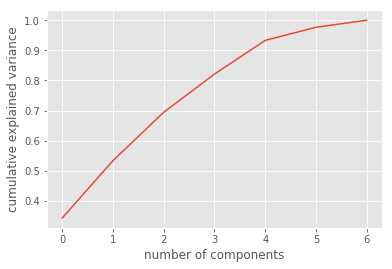

In [161]:

#Choosing number of components 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

plt.show()

# Multiple Regression


In [244]:
#Tip Analysis 
#Question: generous/not generous customer

#variable to use ==> total amount, passenger count, trip distance, rate code, surcharge
#Output ==> tip amount

data = data.iloc[:6000,]

tip_data = data[ ['Total Amount', 'Passenger Count', 'Trip Distance (in miles)', 'Surcharge', 'Tip Amount']]
tip_data
tip_data.describe()

#Creating train and test dataset (2/3 - 1/3)
#msk = np.random.rand(len(tip_data)) < 0.66
#tip_train = tip_data[msk]
#tip_test = tip_data[~msk]
tip_train = tip_data.iloc[:2000,]
tip_test = tip_data.iloc[2001:, ]
tip_data

#2 categories to classify ==> Not Generous, Generous

#tip_data.info()
#tip_data.head()
#tip_data.tail()
#tip_test


,Total Amount,Passenger Count,Trip Distance (in miles),Surcharge,Tip Amount
0,10.80,1,1.68,0.0,0.00
1,8.80,3,1.56,0.5,0.00
2,14.50,5,4.00,0.5,0.00
3,6.30,1,0.80,0.5,0.00
4,12.20,1,1.58,0.5,1.90
5,15.80,2,2.57,0.5,0.00
6,11.80,3,2.50,0.5,0.00
7,11.80,2,1.30,0.5,2.00
8,3.80,2,0.00,0.5,0.00
9,19.30,3,5.62,0.5,0.00


In [9]:
#https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

#***************************************************************************************************************
#Multiple Regression 
#***************************************************************************************************************


# WITH STATSMODELS

target = pd.DataFrame(tip_data[['Tip Amount']])

df = pd.DataFrame(tip_data[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)',  'Surcharge']])

#Multiple Regression 
#Prediction of the tip the customer will give in function of the other variables we selected 
X = df[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)', 'Surcharge']]
y = target["Tip Amount"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

model.summary()

#Analysis: R^2 = 0.535 means this model explain only 53,5% of the variance in our dependent variable


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Tip Amount   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     1723.
Date:                Wed, 18 Apr 2018   Prob (F-statistic):               0.00
Time:                        18:31:34   Log-Likelihood:                -11788.
No. Observations:                6000   AIC:                         2.358e+04
Df Residuals:                    5996   BIC:                         2.361e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Total Amount                 0.1565      0.003     46.938      0.000       0.150       0.163
Passenger Count             -0.0561      0.017     -3.352      0.001      -0.089      -0.023
Trip Distance (in miles)    -0.2277      0.013    -17.766      0.000      -0.253      -0.203
Surcharge                   -0.6139      0.091     -6.717      0.000      -0.793      -0.435
==============================================================================
Omnibus:                     1704.838   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           203573.075
Skew:                          -0.136   Prob(JB):                         0.00
Kurtosis:                      31.535   Cond. No.                         81.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [245]:
# WITH SCICKIT

#target = tip_data[['Tip Amount']]

#df =tip_data[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)',  'Surcharge']]

#Multiple Regression 
#Prediction of the tip the customer will give in function of the other variables we selected 
#X = df[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)',  'Surcharge']]
#y = target["Tip Amount"]



#X = tip_data[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)',  'Surcharge']]
#y = tip_data["Tip Amount"]

X = data[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)',  'Surcharge']]
y = data["Tip Amount"]

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)



lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X)

accuracy = lm.score(X_test, y_test)


print ('Accuracy: ', accuracy)
print("prediction", predictions)

# percentage of explained variance of the predictions
print("R^2 (percentage of variance): " ,lm.score(X,y))

#coefficients for the predictors
print("coef: ", lm.coef_)

# intercept for the predictors
print("intercept", lm.intercept_)



Accuracy:  0.42364625593
prediction [-1.30948839  0.53556166  0.83795416 ...,  0.32609928  0.44235008
  0.94637175]
R^2 (percentage of variance):  0.365040243004
coef:  [ 0.16558178 -0.0341223  -0.23490945  4.43253817]
intercept -2.66900147155


In [246]:
#Test prediction of multiple regression

test_prediction = np.array([8, 2, 5,  0])
test_prediction = test_prediction.reshape(1, -1)

lm.predict(test_prediction)



array([-2.58713906])

# Classification ==> KNN Algo


In [240]:

#***************************************************************************************************************
#Loop to create factors based on a column
#***************************************************************************************************************

#a = tip_data.as_matrix(columns = tip_data.columns[4:5])

#tip_data["Generous ?"] = ""

#i=0
#for i in range(0,6000) :
    
#    if a[i]== 0:
#        tip_data.ix[[i],["Generous ?"]] = "Not Generous"
        
#    else:
#        tip_data.ix[[i],["Generous ?"]] = "Generous"
#tip_data

#dt = tip_data[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)', 'Surcharge', 'Generous ?']]
#dt

#0 ==> NOT GENEROUS
#1 ==> GENEROUS


In [248]:
#*******************************************
#Dummy variable for Generous or not generous
#*******************************************
a = np.array(tip_data["Tip Amount"])

#0 ==> not generous
#1 ==> generous

i=0
for i in range(0,6000) :
    if a[i] == 0: 
        a[i]= 0
    else:
        a[i] = 1

a_dummy = pd.DataFrame({"Generous ?" : a})

frames = [X, a_dummy]

dt = pd.concat(frames, axis=1)
dt


,Total Amount,Passenger Count,Trip Distance (in miles),Surcharge,Generous ?
0,10.80,1,1.68,0.0,0.0
1,8.80,3,1.56,0.5,0.0
2,14.50,5,4.00,0.5,0.0
3,6.30,1,0.80,0.5,0.0
4,12.20,1,1.58,0.5,1.0
5,15.80,2,2.57,0.5,0.0
6,11.80,3,2.50,0.5,0.0
7,11.80,2,1.30,0.5,1.0
8,3.80,2,0.00,0.5,0.0
9,19.30,3,5.62,0.5,0.0


In [249]:
#***************************************************************************************************************
#Classification ==> KNN Algo
#***************************************************************************************************************

X = np.array(dt[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)', 'Surcharge']])
y = np.array(dt['Generous ?'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)


accuracy = clf.score(X_test, y_test)
accuracy



0.7466666666666667

In [250]:
#count how many Generous and not generous 
#dt['Generous ?']

print(dt['Generous ?'].value_counts())


0.0    3249
1.0    2751
Name: Generous ?, dtype: int64


In [251]:
#Test prediction for KNN
#Must use Dummy variables 

example = np.array([12, 4, 2, 0])
example = example.reshape(1, -1)

prediction = clf.predict(example)
prediction

array([ 0.])

# Clustering ==> KMeans


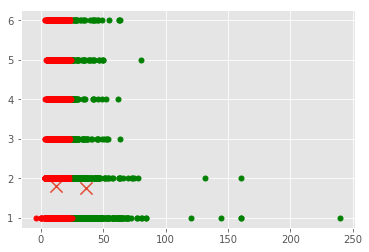

labels : [1 1 1 ..., 1 1 1]
centroids : [[ 36.51033666   1.75685786   8.76254364   0.46882793]
 [ 12.28542516   1.80819546   2.1199673    0.49865333]]


In [22]:


X = np.array(dt[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)', 'Surcharge']])
y = np.array(dt['Generous ?'])

clf = KMeans(n_clusters= 2)
clf.fit(X,y)

centroids = clf.cluster_centers_
labels = clf.labels_


colors = ["g.", "r.", "b."]

for i in range(len(X)):
    plt.plot(X[i][0], X[i,1], colors[labels[i]], markersize = 10)
plt.scatter(centroids[:,0], centroids[:,1], marker = 'x', s = 150, linewidths = 5)   
plt.show()


print("labels :", labels)
print("centroids :", centroids)


# PCA on tip_data

In [252]:
X = dt[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)', 'Surcharge']]
y = dt['Generous ?']


from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)


#Covariance Matrix for X(features)
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)


#eigendecomposition on the covariance matrix

cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors cov \n%s' %eig_vecs)
print('Eigenvalues cov \n%s' %eig_vals)

# correlation matrix with eigendecomposition 

cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('\n\nEigenvectors corr \n%s' %eig_vecs)
print('Eigenvalues corr \n%s' %eig_vals)


Covariance matrix 
[[ 1.00016669 -0.00334224  0.82261837 -0.39916314]
 [-0.00334224  1.00016669  0.01012769  0.03147155]
 [ 0.82261837  0.01012769  1.00016669 -0.21580858]
 [-0.39916314  0.03147155 -0.21580858  1.00016669]]
Eigenvectors cov 
[[-0.66825913  0.72763694 -0.15176776 -0.03067192]
 [ 0.00830328  0.00434774  0.18296143 -0.98307541]
 [-0.62839896 -0.66351826 -0.39761102 -0.08224197]
 [ 0.39808986  0.17398017 -0.88622635 -0.16080493]]
Eigenvalues cov 
[ 2.01154544  0.1545756   0.82848816  1.00605758]


Eigenvectors corr 
[[-0.66825913  0.72763694 -0.15176776 -0.03067192]
 [ 0.00830328  0.00434774  0.18296143 -0.98307541]
 [-0.62839896 -0.66351826 -0.39761102 -0.08224197]
 [ 0.39808986  0.17398017 -0.88622635 -0.16080493]]
Eigenvalues corr 
[ 2.01121018  0.15454984  0.82835008  1.00588991]


In [253]:

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.01121017774
1.00588990704
0.828350076647
0.154549838577


In [254]:

#X = tip_data[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)',  'Surcharge']]
#y = tip_data["Tip Amount"]


#pca = PCA(n_components=1, svd_solver='full')
pca=PCA()
pca.fit(X_std)

T = pca.transform(X_std)

X_std.shape
print("initial shape: ", X_std.shape)

T.shape
print("transformed shape: ", T.shape)


print("explaned variance: ", pca.explained_variance_ratio_)
print("compenents: ", pca.components_)

initial shape:  (6000, 4)
transformed shape:  (6000, 4)
explaned variance:  [ 0.50280254  0.25147248  0.20708752  0.03863746]
compenents:  [[ 0.66825913 -0.00830328  0.62839896 -0.39808986]
 [ 0.03067192  0.98307541  0.08224197  0.16080493]
 [-0.15176776  0.18296143 -0.39761102 -0.88622635]
 [ 0.72763694  0.00434774 -0.66351826  0.17398017]]


In [255]:
#components = pd.DataFrame(pca.components_, columns =X_std.columns, index=[1, 2])

components = pd.DataFrame(pca.components_, columns = ['Total Amount', 'Passenger Count', 'Trip Distance (in miles)', 'Surcharge'])
components

,Total Amount,Passenger Count,Trip Distance (in miles),Surcharge
0,0.668259,-0.008303,0.628399,-0.398090
1,0.030672,0.983075,0.082242,0.160805
2,-0.151768,0.182961,-0.397611,-0.886226
3,0.727637,0.004348,-0.663518,0.173980


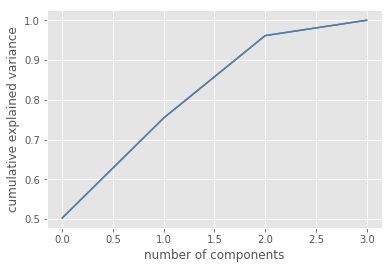

In [257]:

#Choosing number of components 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

plt.show()
